### Creating figures for 10.3 snps

In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import csv
import statistics
import statsmodels.api as sm

import pandas_plink
from os.path import join
from pandas_plink import read_plink
from pandas_plink import get_data_folder
from pandas_plink import read_plink1_bin
from pandas_plink import get_data_folder

import scipy.stats as s
from scipy.stats import kruskal
from tqdm import tqdm

In [2]:
# Read in the bed, bim, fam files we want to get the genotypes for the specific LOF snp's we are looking for
# vep intersection is the snp's in agreement for round 10.3 through Thiago and Sakina's analysis through VEP
(bim, fam, bed) = read_plink("r10.3.2",
                             verbose=False)
variants_id = list((pd.read_csv('vep_intersection10.3.csv'))['0'])
filtered = bim.loc[bim['snp'].isin(variants_id)]
indices = filtered['i'].tolist()

genotypes = pd.DataFrame(bed[indices, :], columns = fam.iid.values, index = bim.snp[indices].values).T

#Takes out all snp's where all individuals have the same genotype (There are not necessarily any columns like this tho)
geno = genotypes.loc[:,genotypes.apply(pd.Series.nunique) != 1]

/tmp/ipykernel_1385799/1271117398.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  (bim, fam, bed) = read_plink("r10.3.2",
/tmp/ipykernel_1385799/1271117398.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  (bim, fam, bed) = read_plink("r10.3.2",


In [3]:
geno

,1:61235370,1:63706676,1:78033225,1:94378103,1:94674775,1:94757435,1:102666585,1:159075582,1:196895135,1:252683863,...,14:67062377,14:69146094,14:69457499,14:72134341,15:55199121,18:15004098,18:24453540,18:29119628,20:4478777,20:4600526
001SP00732AAE,2.0,2.0,2.0,2.0,0.0,2.0,2.0,0.0,1.0,2.0,...,1.0,1.0,2.0,1.0,0.0,1.0,2.0,2.0,2.0,0.0
002SP00737AAE,2.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,2.0,1.0,...,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0
003SP00744AAE,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,2.0,2.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0
004SP00735AAE,1.0,2.0,2.0,2.0,0.0,2.0,1.0,0.0,1.0,2.0,...,1.0,1.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0.0
005SP00752AAE,1.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46693-1-5,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,1.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,1.0
48371-1,2.0,2.0,2.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,...,1.0,1.0,2.0,1.0,0.0,0.0,2.0,2.0,1.0,2.0
44789-2-4,1.0,2.0,2.0,2.0,1.0,2.0,0.0,0.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,0.0,2.0,2.0,1.0,1.0
46674-1-5,1.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,...,1.0,1.0,2.0,1.0,2.0,0.0,2.0,1.0,2.0,2.0


In [38]:
#Getting all the phenotypes from the plink_phenotypes folder

plink_phenotypes = '/tscc/projects/ps-palmer/samuckadam/code/plink_phenotypes'
print(os.getcwd())
phenotypes = pd.read_csv(
    '/tscc/projects/ps-palmer/samuckadam/code/plink_phenotypes/regressedlr_add_ind_calc_no_z_shock_03_avg1h.phen', 
    sep="\t", index_col=0)

phenotypes.drop(columns=phenotypes.columns, inplace=True)

for p in os.listdir(plink_phenotypes):
    with open(os.path.join(plink_phenotypes, p)) as phenotype_file:
        # Read content of file
        trait = pd.read_csv(phenotype_file, sep="\t", index_col=0)
        trait.drop(columns = trait.columns[0], inplace = True)
        phenotypes = pd.concat([phenotypes, trait], axis = 1)


/tscc/projects/ps-palmer/samuckadam/code/10.3


In [56]:
phenotypes

,regressedlr_cue_active,regressedlr_sha_titration_phase_01_02,regressedlr_pavca_mi_d5_prob_diff,regressedlr_lr_px_pre_act1_5,regressedlr_soc_totalrs,regressedlr_social_dist2soczonetotal,regressedlr_shock_base_active,regressedlr_pavca_mi_responsebias_d4d5,regressedlr_dd_idpt600,regressedlr_rt_pint7_5,...,regressedlr_nicsa_total_infusion,regressedlr_add_index_sexcohort_z,regressedlr_sha_mean_to_01_03,regressedlr_soc_totalti_7_5,regressedlr_sha_10_locomotion,regressedlr_ccc_d7_avg_vel,regressedlr_soc_opcon_num_ti_4_5,regressedlr_lr_lt_reinforcers,regressedlr_oft_time_1,regressedlr_soc_midconrs_16_5
933000120124701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.162712,-0.135112,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000120138579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.230023,0.306340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000120138607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.415384,0.765582,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000320046379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.100014,1.122424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000320047335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.204750,-2.696400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933000320697705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000320697669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000320624675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
933000320525459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


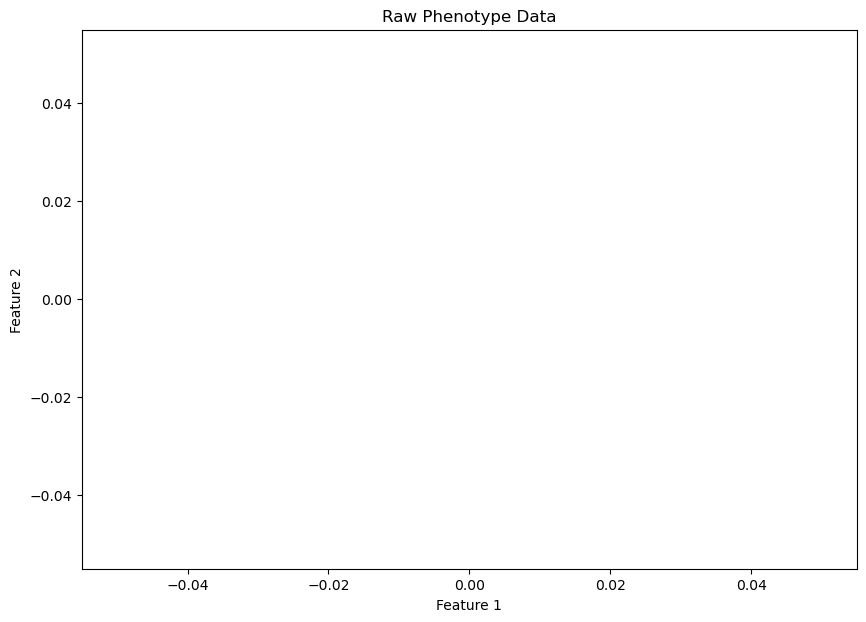

In [51]:
# Plot raw data
plt.figure(figsize=(10, 7))
plt.scatter(phenotypes.iloc[:, 0], phenotypes.iloc[:, 1], alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Raw Phenotype Data')
plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler

clean_data = phenotypes.fillna(phenotypes.mean())

scaler = StandardScaler()
standardized_data = scaler.fit_transform(clean_data)

In [41]:
from sklearn.cluster import KMeans

# Define the number of clusters
k = 3

# Initialize and fit K-means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(standardized_data)

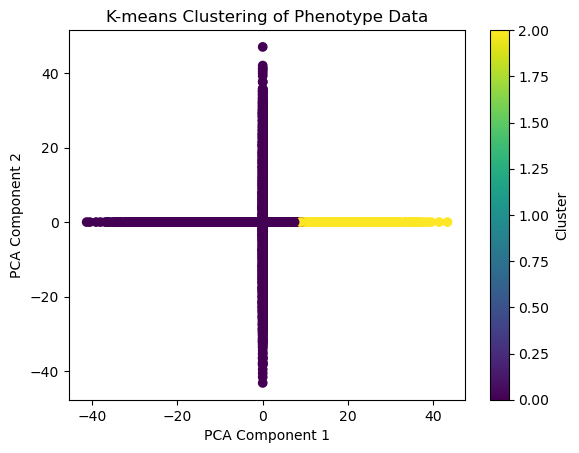

In [48]:
import matplotlib.pyplot as plt

# Assuming the first two principal components for 2D visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-means Clustering of Phenotype Data')
plt.colorbar(label='Cluster')
plt.show()

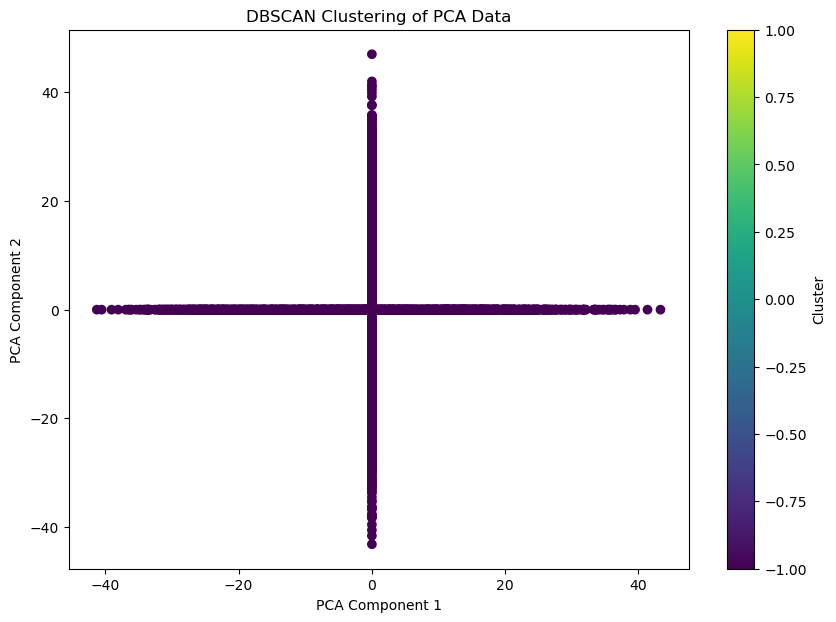

In [50]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_dbscan = dbscan.fit_predict(standardized_data)

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters_dbscan, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering of PCA Data')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
if np.any(np.isnan(standardized_data)):
    print("NaN values found in the data.")
else:
    print("No NaN values in the data.")

# Check for infinite values
if np.any(np.isinf(standardized_data)):
    print("Infinite values found in the data.")
else:
    print("No infinite values in the data.")

No NaN values in the data.
No infinite values in the data.


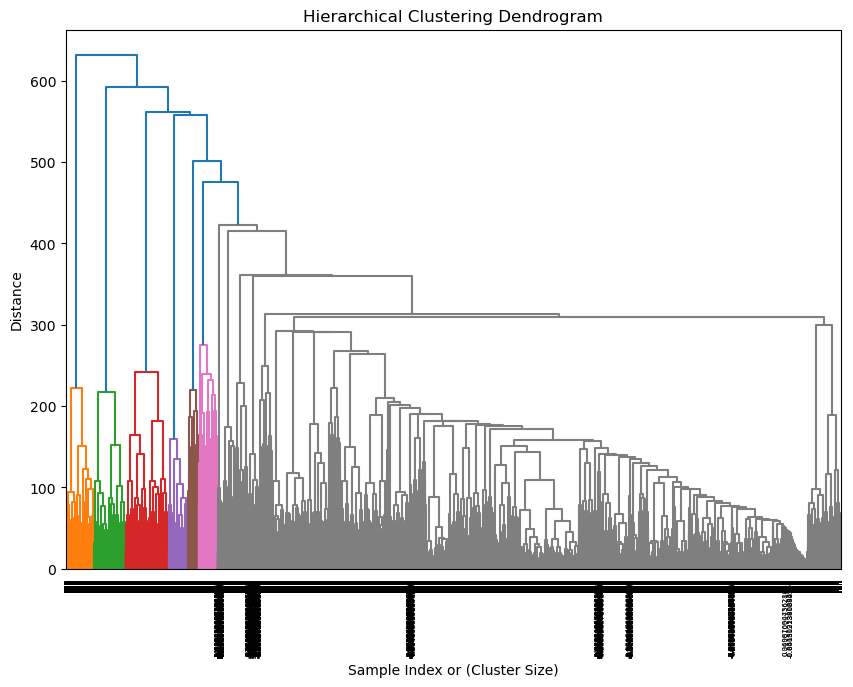

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(standardized_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=phenotypes.iloc[:, 0].values, leaf_rotation=90)
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [18]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters or the height to cut
num_clusters = 3
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Add cluster labels to the original dataframe
phenotypes['Cluster'] = clusters

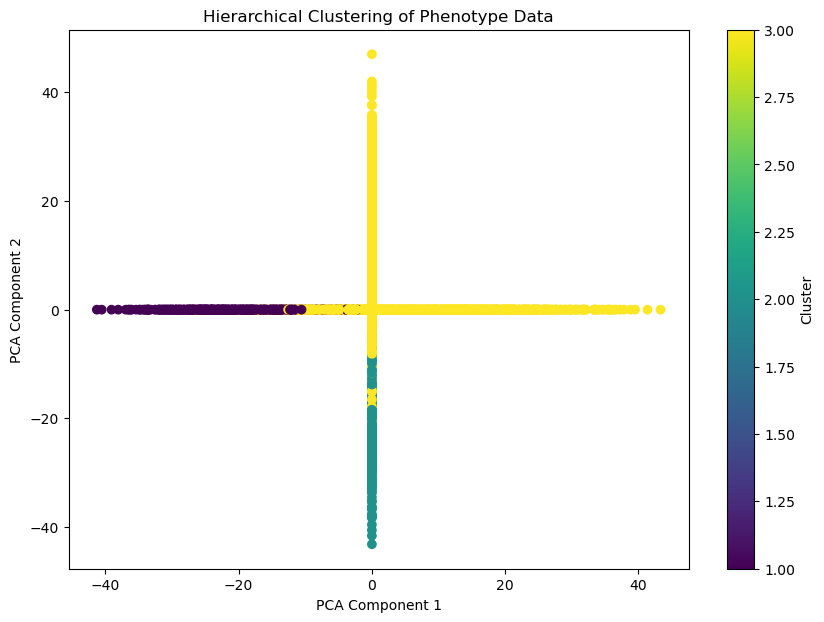

In [19]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(standardized_data)

plt.figure(figsize=(10, 7))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clustering of Phenotype Data')
plt.colorbar(label='Cluster')
plt.show()